In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ww-data-long-2023-05-02.csv')
# remove rows with NaN values
df = df.dropna()
# remove rows with Daily mean = 0
df = df[df['Daily mean'] != 0]
df

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2022,amphetamine,AT001,AT,Graz,24.00,20.90,24.22,27.86,28.27,23.80,22.20,22.37,26.03,24.46
1,2022,amphetamine,AT002,AT,Hall-Wattens,9.01,13.61,9.28,11.82,11.08,11.31,6.84,9.82,10.87,10.42
2,2022,amphetamine,AT004,AT,Innsbruck,10.18,9.80,11.70,16.02,14.86,13.35,19.45,13.14,13.98,13.62
3,2022,amphetamine,AT005,AT,Kapfenberg,32.16,28.14,30.94,21.49,21.35,23.80,12.96,24.42,24.40,24.41
4,2022,amphetamine,AT006,AT,Klagenfurt,6.74,6.87,12.77,9.57,11.62,7.86,6.65,6.76,10.46,8.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,2011,methamphetamine,CZ002,CZ,České Budějovice,170.18,169.00,193.88,167.00,145.98,176.65,205.73,181.64,170.88,175.49
3068,2011,methamphetamine,ES001,ES,Barcelona,6.43,8.12,9.31,10.50,10.66,6.52,7.46,7.34,9.24,8.43
3074,2011,methamphetamine,IT002,IT,Milan,44.46,41.37,48.55,54.00,63.47,45.44,43.47,43.10,52.86,48.68
3078,2011,methamphetamine,NO001,NO,Oslo,235.00,212.60,231.06,186.16,295.50,302.46,250.71,232.77,253.80,244.79


In [3]:
days = ["Monday" ,"Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday"]
days_norm = [f"{day}_norm" for day in days]
for day in days:
    df[f"{day}_norm"] = df[day] / df["Daily mean"]
df

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Weekday mean,Weekend mean,Daily mean,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
0,2022,amphetamine,AT001,AT,Graz,24.00,20.90,24.22,27.86,28.27,...,22.37,26.03,24.46,0.973017,0.907604,0.981194,0.854456,0.990188,1.139002,1.155765
1,2022,amphetamine,AT002,AT,Hall-Wattens,9.01,13.61,9.28,11.82,11.08,...,9.82,10.87,10.42,1.085413,0.656430,0.864683,1.306142,0.890595,1.134357,1.063340
2,2022,amphetamine,AT004,AT,Innsbruck,10.18,9.80,11.70,16.02,14.86,...,13.14,13.98,13.62,0.980176,1.428047,0.747430,0.719530,0.859031,1.176211,1.091043
3,2022,amphetamine,AT005,AT,Kapfenberg,32.16,28.14,30.94,21.49,21.35,...,24.42,24.40,24.41,0.975010,0.530930,1.317493,1.152806,1.267513,0.880377,0.874642
4,2022,amphetamine,AT006,AT,Klagenfurt,6.74,6.87,12.77,9.57,11.62,...,6.76,10.46,8.87,0.886133,0.749718,0.759865,0.774521,1.439684,1.078918,1.310034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,2011,methamphetamine,CZ002,CZ,České Budějovice,170.18,169.00,193.88,167.00,145.98,...,181.64,170.88,175.49,1.006610,1.172318,0.969742,0.963018,1.104792,0.951621,0.831842
3068,2011,methamphetamine,ES001,ES,Barcelona,6.43,8.12,9.31,10.50,10.66,...,7.34,9.24,8.43,0.773428,0.884935,0.762752,0.963227,1.104389,1.245552,1.264531
3074,2011,methamphetamine,IT002,IT,Milan,44.46,41.37,48.55,54.00,63.47,...,43.10,52.86,48.68,0.933443,0.892975,0.913311,0.849836,0.997329,1.109285,1.303821
3078,2011,methamphetamine,NO001,NO,Oslo,235.00,212.60,231.06,186.16,295.50,...,232.77,253.80,244.79,1.235590,1.024184,0.960007,0.868500,0.943911,0.760489,1.207157


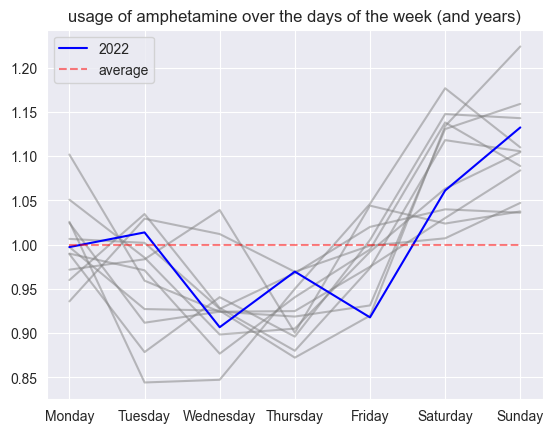

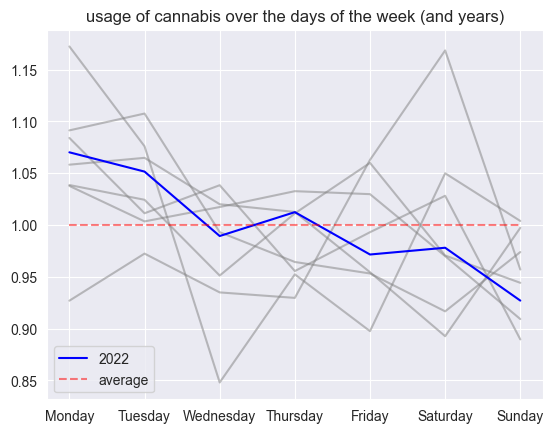

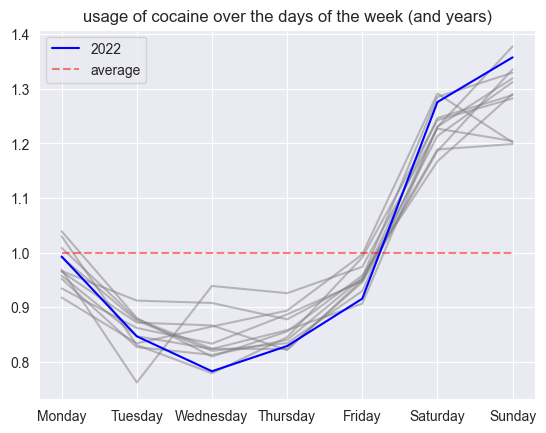

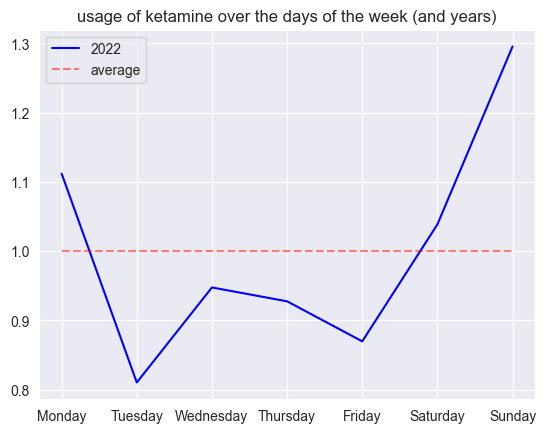

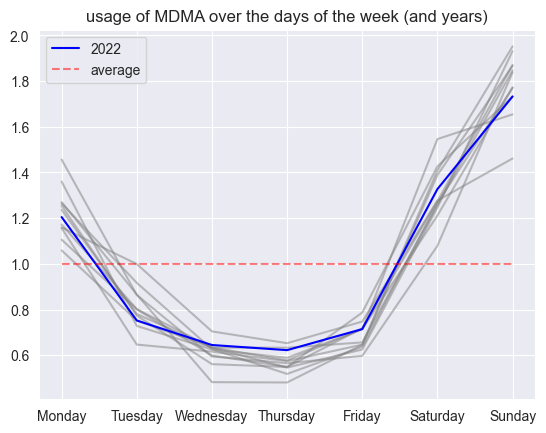

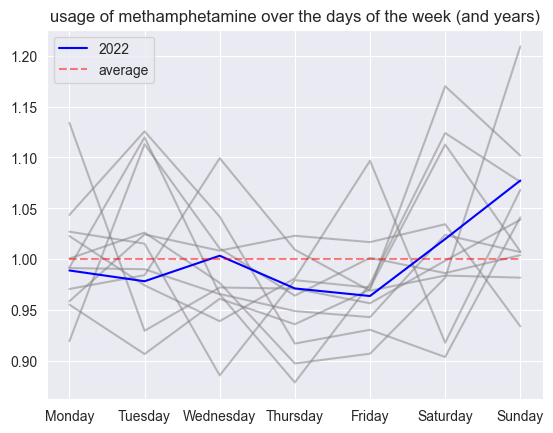

In [4]:
unique_drugs = df["Metabolite"].unique()

for drug in unique_drugs:
    df_drug = df[df["Metabolite"] == drug]
    # compute the mean of the normalized values for each day
    mean_day = df_drug.groupby("Year")[days_norm].sum() / df_drug.groupby("Year")[days_norm].count()

    for year in mean_day.index:
        if year == 2022:
            plt.plot(days, mean_day.loc[year], label=year, c="blue")
        else:
            plt.plot(days, mean_day.loc[year], c="grey", alpha=0.5)
    plt.title(f"usage of {drug} over the days of the week (and years)")
    plt.hlines(1, 0, 6, colors="red", linestyles="dashed", alpha=0.5, label="average")
    plt.legend()
    plt.show()


In [5]:
mdma = df[(df["Metabolite"] == "MDMA") & (df["Year"] == 2022)]
# group by country and compute the mean of the normalized values for each day
country_mdma_norm = mdma.groupby("Country")[days_norm].sum() / mdma.groupby("Country")[days_norm].count()
# add a mean row
country_mdma_norm.loc["mean"] = country_mdma_norm.mean()
country_mdma_norm


,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
Country,,,,,,,
AT,1.210836,0.739498,0.608660,0.572004,0.825945,1.356938,1.684743
BE,1.525692,0.728789,0.596782,0.870902,0.593435,0.912493,1.772020
CH,0.992179,0.528731,0.511153,0.414677,0.426954,1.786197,2.340741
CY,2.010156,0.875448,0.677294,0.445812,0.394409,0.839241,1.763240
CZ,1.361120,1.152836,0.905116,0.735128,0.850470,0.843122,1.152603
DE,1.414594,0.670768,0.475508,0.460836,0.429411,1.190461,2.333565
DK,1.326838,0.502222,0.376752,0.345299,0.522051,1.646496,2.279316
EE,1.482514,1.229560,0.674158,0.682040,0.706380,0.886848,1.335977
ES,1.203934,0.800866,0.526887,0.545500,0.810079,1.186510,1.926171


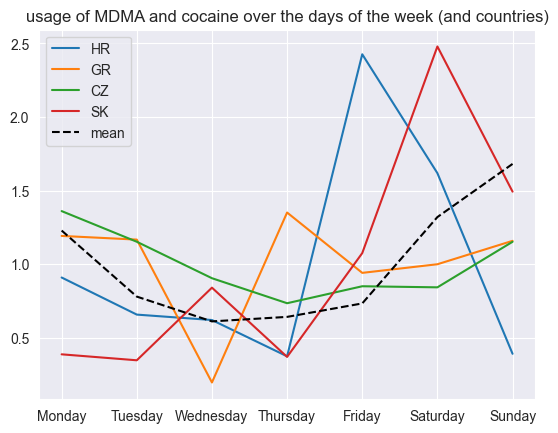

In [6]:
# compute correlation between countries and the mean
corr = country_mdma_norm.corrwith(country_mdma_norm.loc["mean"], axis=1)
corr = corr.sort_values(ascending=True)
# plot the first few countries together with the mean
for country in corr.index[:4]:
    plt.plot(days, country_mdma_norm.loc[country], label=country)
plt.plot(days, country_mdma_norm.loc["mean"], label="mean", c="black", linestyle="dashed")
plt.title("usage of MDMA and cocaine over the days of the week (and countries)")
plt.legend()

In [7]:
mdma = df[(df["Metabolite"] == "MDMA") & (df["Year"] == 2022)]
# group by city and compute the mean of the normalized values for each day
mdma = mdma.groupby("City")[days_norm].sum() / mdma.groupby("City")[days_norm].count()
mdma.loc["mean"] = mdma.mean()

Text(0.5, 1.0, 'cities with weird usage of MDMA over the days of the week')

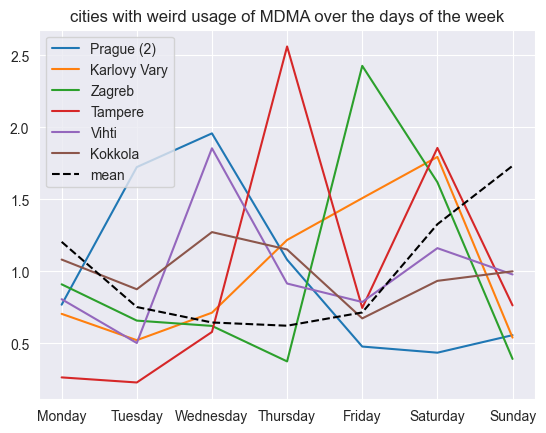

In [8]:
corr_city = mdma.corrwith(mdma.loc["mean"], axis=1)
corr_city = corr_city.sort_values(ascending=True)
# plot the first few countries together with the mean
for city in corr_city.index[:6]:
    plt.plot(days, mdma.loc[city], label=city)
plt.plot(days, mdma.loc["mean"], label="mean", c="black", linestyle="dashed")
plt.legend()
plt.title("cities with weird usage of MDMA over the days of the week")


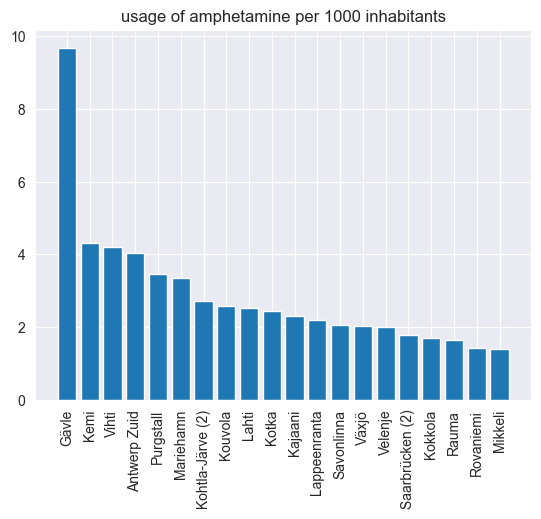

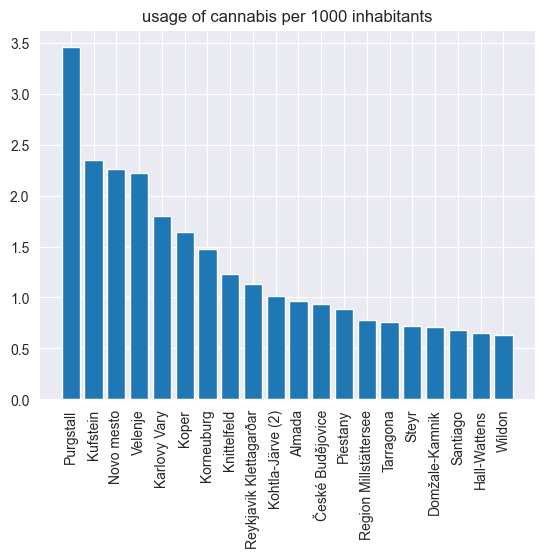

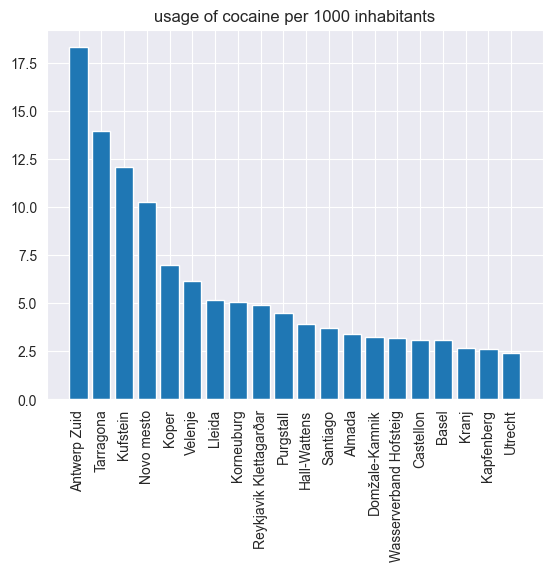

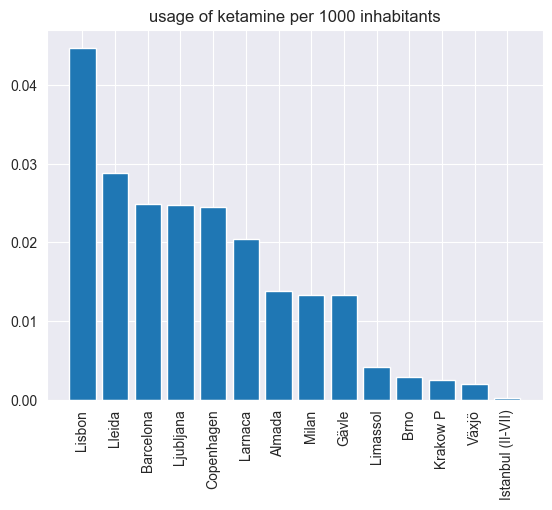

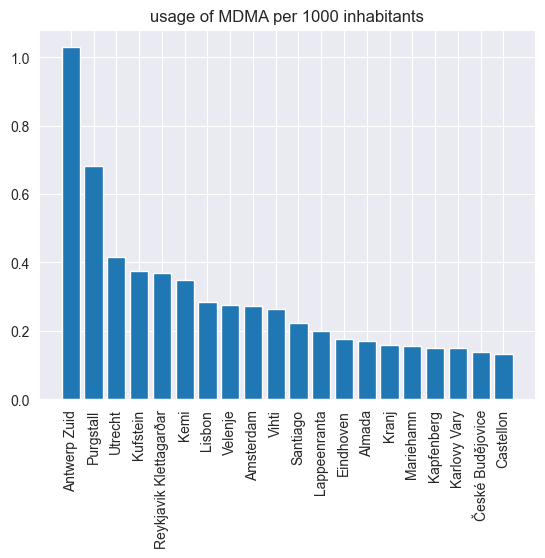

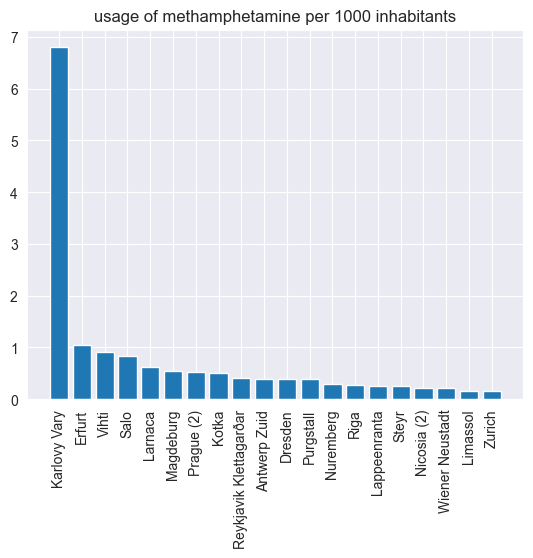

In [30]:
small_df = df[df["Year"] == 2022]
# keep only columns Country, City and Metabolite
small_df = small_df[["Country", "City", "Metabolite", "Daily mean"]]

city_df = pd.read_csv("ww-sites-2023-05-02.csv")
city_df = city_df[["City", "Population"]]

# join the two dataframes
small_df = small_df.join(city_df.set_index("City"), on="City")
small_df["Daily mean / Population"] = small_df["Daily mean"] / small_df["Population"] * 1000
small_df = small_df.dropna()

for drug in small_df["Metabolite"].unique():
    small_df_drug = small_df[small_df["Metabolite"] == drug]
    small_df_drug = small_df_drug.sort_values(by="Daily mean / Population", ascending=False)
    # plot first 20 cities
    small_df_drug = small_df_drug[:20]
    plt.bar(small_df_drug["City"], small_df_drug["Daily mean / Population"])
    plt.xticks(rotation=90)
    plt.title(f"usage of {drug} per 1000 inhabitants")
    # plt.yscale("log")
    plt.show()

In [11]:
df

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Weekday mean,Weekend mean,Daily mean,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
0,2022,amphetamine,AT001,AT,Graz,24.00,20.90,24.22,27.86,28.27,...,22.37,26.03,24.46,0.973017,0.907604,0.981194,0.854456,0.990188,1.139002,1.155765
1,2022,amphetamine,AT002,AT,Hall-Wattens,9.01,13.61,9.28,11.82,11.08,...,9.82,10.87,10.42,1.085413,0.656430,0.864683,1.306142,0.890595,1.134357,1.063340
2,2022,amphetamine,AT004,AT,Innsbruck,10.18,9.80,11.70,16.02,14.86,...,13.14,13.98,13.62,0.980176,1.428047,0.747430,0.719530,0.859031,1.176211,1.091043
3,2022,amphetamine,AT005,AT,Kapfenberg,32.16,28.14,30.94,21.49,21.35,...,24.42,24.40,24.41,0.975010,0.530930,1.317493,1.152806,1.267513,0.880377,0.874642
4,2022,amphetamine,AT006,AT,Klagenfurt,6.74,6.87,12.77,9.57,11.62,...,6.76,10.46,8.87,0.886133,0.749718,0.759865,0.774521,1.439684,1.078918,1.310034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,2011,methamphetamine,CZ002,CZ,České Budějovice,170.18,169.00,193.88,167.00,145.98,...,181.64,170.88,175.49,1.006610,1.172318,0.969742,0.963018,1.104792,0.951621,0.831842
3068,2011,methamphetamine,ES001,ES,Barcelona,6.43,8.12,9.31,10.50,10.66,...,7.34,9.24,8.43,0.773428,0.884935,0.762752,0.963227,1.104389,1.245552,1.264531
3074,2011,methamphetamine,IT002,IT,Milan,44.46,41.37,48.55,54.00,63.47,...,43.10,52.86,48.68,0.933443,0.892975,0.913311,0.849836,0.997329,1.109285,1.303821
3078,2011,methamphetamine,NO001,NO,Oslo,235.00,212.60,231.06,186.16,295.50,...,232.77,253.80,244.79,1.235590,1.024184,0.960007,0.868500,0.943911,0.760489,1.207157
